<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

# IMPORTS

In [43]:
jsdf_path = 'C:/Users/Adam/Desktop/ECON628-01-adamjf/projects/project1.csv'
jsdf = pd.read_csv(jsdf_path)

# READ

In [44]:
jsdf.head()

# HAVE A LOOK

,idno,branch,bcode,dist,dcode,vil,vcode,b11,b315a1,b31101,...,h93,h94,h95,h96,h97,h98,h99,h100,h101,treatmentTI
0,12,IBANDA,1,IBANDA,NaN,KANKYENDE II,112,PRISCILLAH RUKUNDO,26.0,7.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6
1,8403,IBANDA,1,IBANDA,NaN,KANKYENDE II,112,PRISCILLAH RUKUNDO,40.0,6.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
2,23,IBANDA,1,IBANDA,NaN,KANKYENDE II,112,TAREMWA JOHANES,53.0,4.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,6
3,37,IBANDA,1,IBANDA,NaN,KANKYENDE II,112,KALIMA LILIAN UFITABE,38.0,5.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,6
4,28,IBANDA,1,IBANDA,NaN,KANKYENDE II,112,PRISCILLAH RUKUNDO,28.0,7.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6


In [45]:
jsdf.shape

# (ROWS, COLUMNS)

(7690, 41)

In [46]:
jsdf.info()

# NUMBER OF ENTRIES, DTYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 41 columns):
idno           7690 non-null int64
branch         7690 non-null object
bcode          7690 non-null int64
dist           7690 non-null object
dcode          28 non-null float64
vil            7690 non-null object
vcode          7690 non-null int64
b11            7685 non-null object
b315a1         7671 non-null float64
b31101         7540 non-null float64
b522_1         7534 non-null float64
b522_2         7448 non-null float64
b522_3         7128 non-null float64
b522_4         6382 non-null float64
b522_5         5153 non-null float64
b522_6         3910 non-null float64
b5220_1        7538 non-null float64
b5220_2        7419 non-null float64
b5220_3        7119 non-null float64
b5220_4        6388 non-null float64
b5220_5        5208 non-null float64
b5220_6        3950 non-null float64
b552           7228 non-null float64
b5512          7604 non-null float64
b5514          47

In [47]:
jsdf.describe()

# SUMMARY STATS

,idno,bcode,dcode,vcode,b315a1,b31101,b522_1,b522_2,b522_3,b522_4,...,h93,h94,h95,h96,h97,h98,h99,h100,h101,treatmentTI
count,7690.000000,7690.000000,28.000000,7690.000000,7671.000000,7540.000000,7534.000000,7448.000000,7128.000000,6382.000000,...,6785.000000,6786.000000,6784.000000,6788.000000,6788.000000,6788.000000,6785.000000,6785.000000,6784.000000,7690.000000
mean,4435.033030,4.224837,1.928571,296760.517685,38.383262,6.201326,10.874303,11.840897,14.595819,16.821686,...,1.701695,1.651194,1.556162,1.420153,1.293754,1.241750,1.210759,1.208254,1.214180,3.985696
std,2555.382431,2.388855,1.903770,304930.390748,14.394241,3.831239,10.160689,9.734811,11.812046,13.306632,...,0.457548,0.476628,0.496872,0.493620,0.455514,0.428175,0.407878,0.406089,0.410283,1.990040
min,1.000000,1.000000,1.000000,112.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2207.750000,1.000000,1.000000,11175.000000,28.000000,4.000000,2.000000,5.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,4461.500000,3.000000,1.000000,71143.000000,35.000000,7.000000,9.000000,9.000000,9.000000,9.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
75%,6662.750000,6.000000,1.250000,610858.000000,46.000000,7.000000,9.000000,9.000000,23.000000,29.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000
max,8953.000000,7.000000,7.000000,712452.000000,110.000000,18.000000,50.000000,50.000000,50.000000,50.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [71]:
jsdf = jsdf.rename(columns={'b315a1': 'age', 'b31101': 'education', 'm523_6': 'mid_area'})

# RENAME SOME COLUMNS

In [49]:
jsdf.isnull().sum()

# INVESTIGATE NULL VALUES: IF I DROP ROWS W NANS, I WILL LOSE THE WHOLE SET! THIS IS AN EXTREMELY MESSY DATASET
# IT REPRESENTS THE MERGED BASELINE AND MIDLINE SURVEYS OF AN RCT IN UGANDA
# PRIMARY OUTCOME OF INTEREST: ORANGE-FLESHED SWEET POTATO (OFSP) ADOPTION AS MEASURED BY AREA PLANTED WITH OFSP

idno              0
branch            0
bcode             0
dist              0
dcode          7662
vil               0
vcode             0
b11               5
age              19
education       150
b522_1          156
b522_2          242
b522_3          562
b522_4         1308
b522_5         2537
b522_6         3780
b5220_1         152
b5220_2         271
b5220_3         571
b5220_4        1302
b5220_5        2482
b5220_6        3740
b552            462
b5512            86
b5514          2925
b5517          7554
m523_6         4446
m552            710
m5517          1038
h91             904
h92             902
h93             905
h94             904
h95             906
h96             902
h97             902
h98             902
h99             905
h100            905
h101            906
treatmentTI       0
dtype: int64

In [50]:
jsdf.dropna(subset = ['age'], inplace=True)

# AGE ONLY HAS 19 MISSING OBSERVATIONS SO WE CAN DROP IT WITHOUT MUCH LOSS

In [52]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

# HISTOGRAM PLOTTER, CODE FROM JAVI

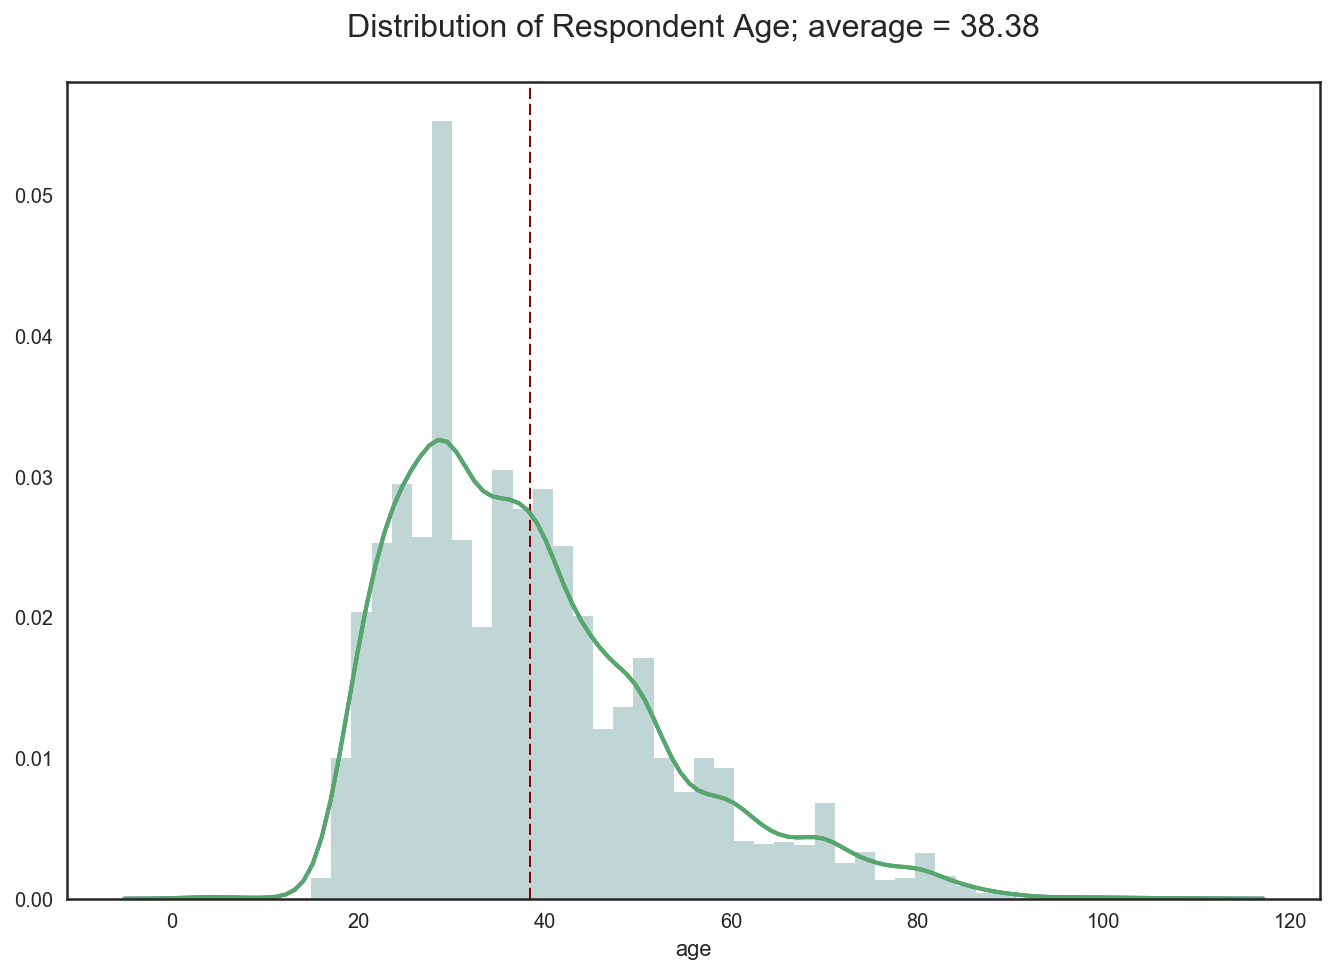

In [53]:
age = jsdf.age
histogram_plotter("Respondent Age", age)

# TAKING A LOOK AT DISTRO OF RESPONDENT AGE: LOOKS LIKE A LOT OF PEOPLE ARE ROUNDING TO THE NEAREST DECADE AND IT LOOKS LIKE 
# THEY'RE ROUNDING DOWN!!! NOTE THE TROUGHS TO THE RIGHT OF THE CRESTS. I'M 30 TOO!

In [101]:
t1_age = jsdf.loc[jsdf.treatmentTI == 1]
t2_age = jsdf.loc[jsdf.treatmentTI == 2]
t3_age = jsdf.loc[jsdf.treatmentTI == 3]
t4_age = jsdf.loc[jsdf.treatmentTI == 4]
t5_age = jsdf.loc[jsdf.treatmentTI == 5]
t6_age = jsdf.loc[jsdf.treatmentTI == 6]
t7_age = jsdf.loc[jsdf.treatmentTI == 7]

# Slicing age observations by treatment (study is a 7-arm RCT) to investigate heterogeneity in age between treatment arms.

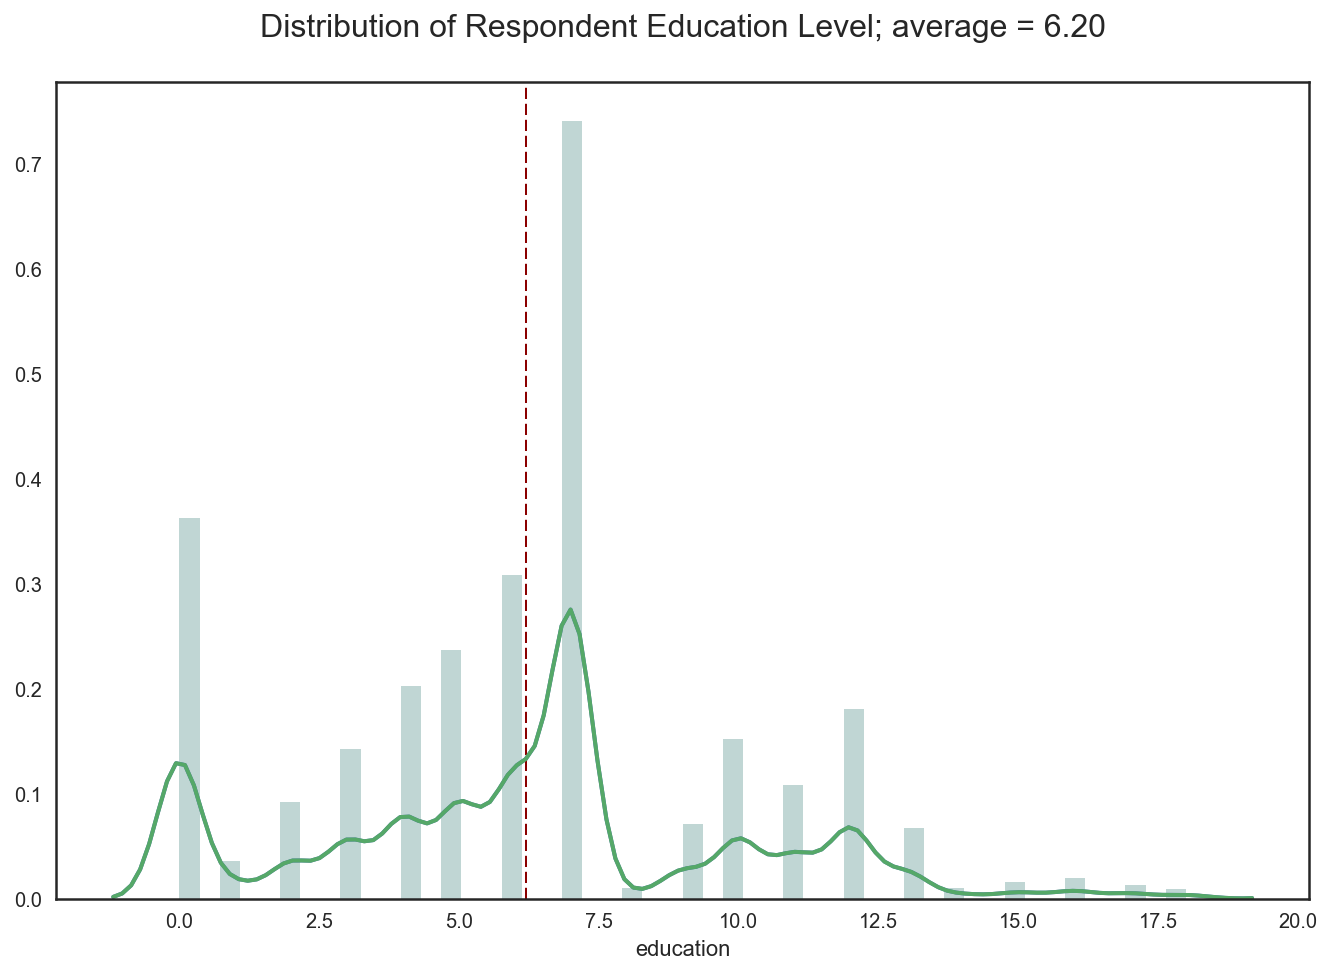

In [54]:
jsdfeducation = jsdf
jsdfeducation.dropna(subset = ['education'], inplace=True)

education = jsdf.education
histogram_plotter("Respondent Education Level", education)

# EDUCATION DISTRO OF RESPONDENTS. NOTE LARGE DROPOFFS AFTER THREE DISTINCT THRESHOLDS. THESE REPRESENT NO SCHOOLING, 
# AND LEVELS SOMEWHAT ANALOGOUS TO MIDDLE SCHOOL AND HIGH SCHOOL IN UGANDA

In [58]:
jsdf['base_area'] = 0
jsdf.loc[(jsdf['b522_1'] == 6) , 'base_area'] = jsdf['b5220_1']
jsdf.loc[(jsdf['b522_2'] == 6) , 'base_area'] = jsdf['b5220_2']
jsdf.loc[(jsdf['b522_3'] == 6) , 'base_area'] = jsdf['b5220_3']
jsdf.loc[(jsdf['b522_4'] == 6) , 'base_area'] = jsdf['b5220_4']
jsdf.loc[(jsdf['b522_5'] == 6) , 'base_area'] = jsdf['b5220_5']
jsdf.loc[(jsdf['b522_6'] == 6) , 'base_area'] = jsdf['b5220_6']

# CONSTRUCTING AREA PLANTED WITH ORANGE-FLESHED SWEET POTATO (OFSP) AT BASELINE

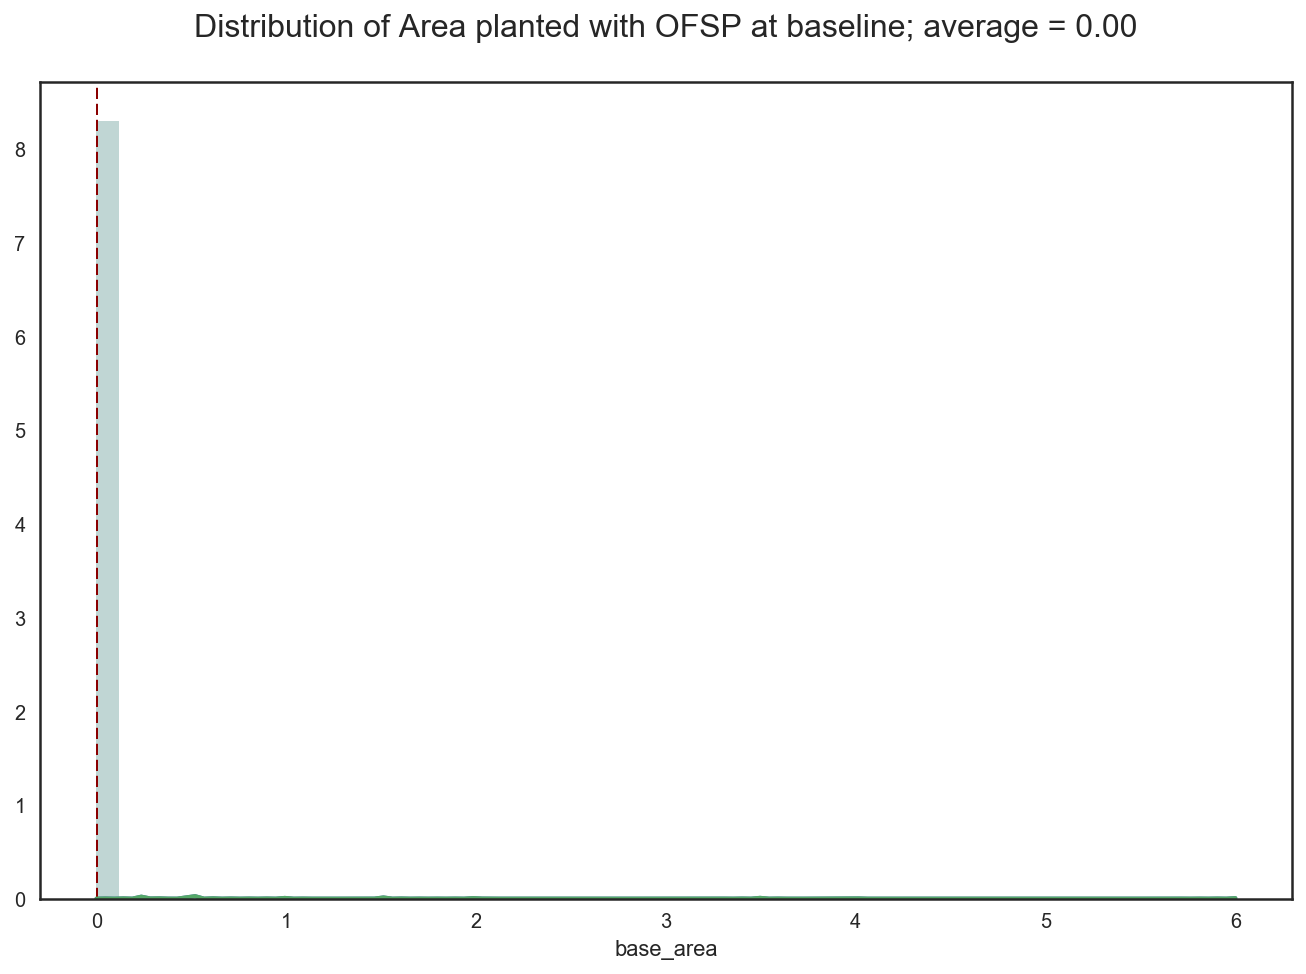

In [65]:
jsdf_base_area = jsdf
jsdf_base_area.dropna(subset = ['base_area'], inplace=True)
base_area = jsdf_base_area['base_area']
histogram_plotter("Area planted with OFSP at baseline", base_area)

# VISUALISING DISTRO OF AREA PLANTED WITH OFSP AT BASELINE. ALMOST ALL ZERO. LET'S ZOOM IN...

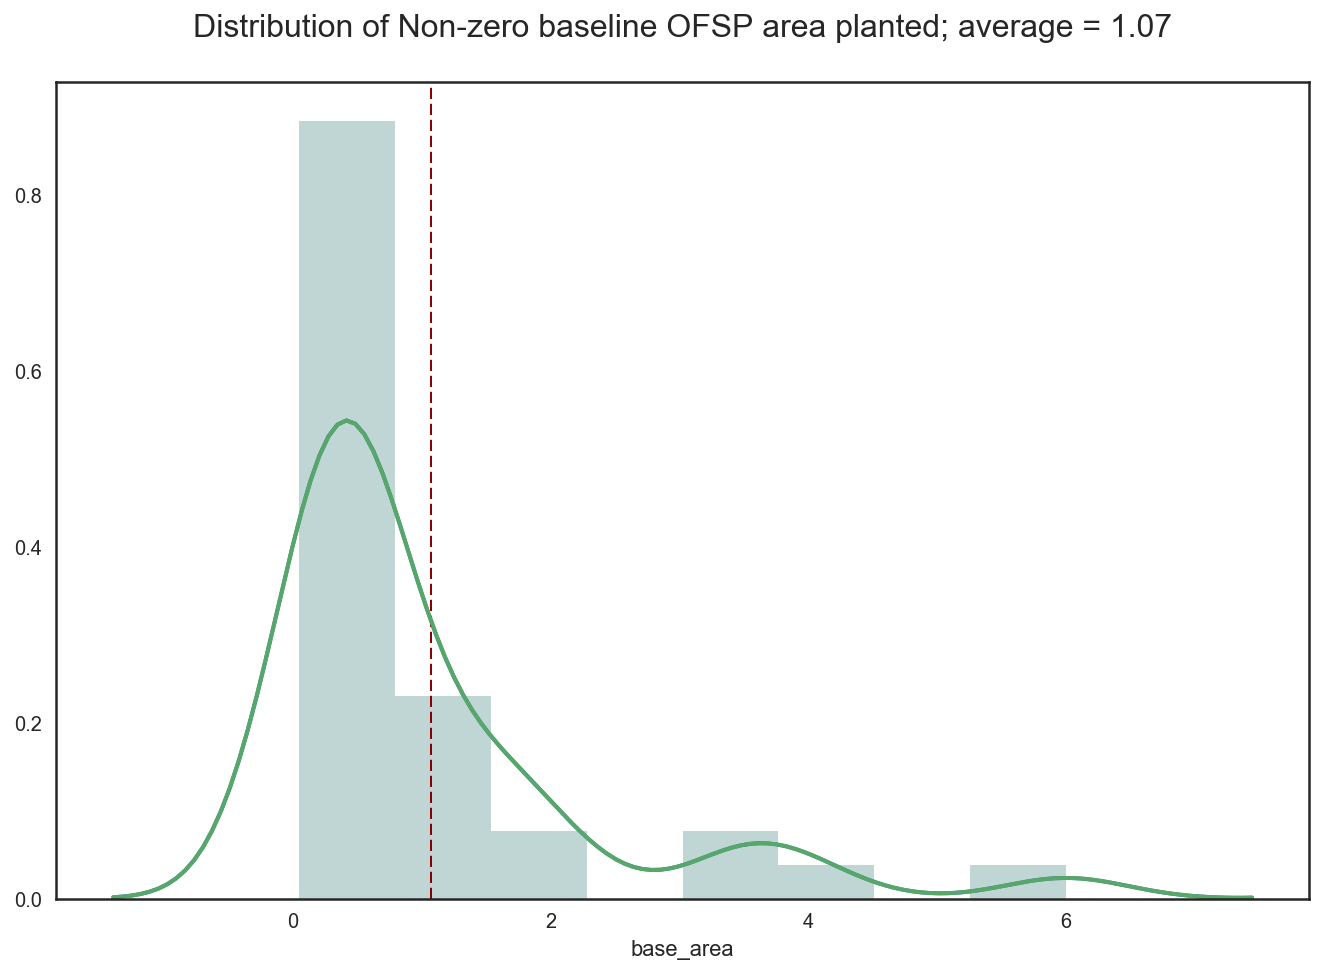

In [68]:
base_area_nonzero = base_area[(base_area > 0)]
histogram_plotter("Non-zero baseline OFSP area planted", base_area_nonzero)

# VISUALIZING DISTRO OF AREA PLANTED WITH OFSP AT BASELINE, RESTRICTED TO NON-ZERO VALUES

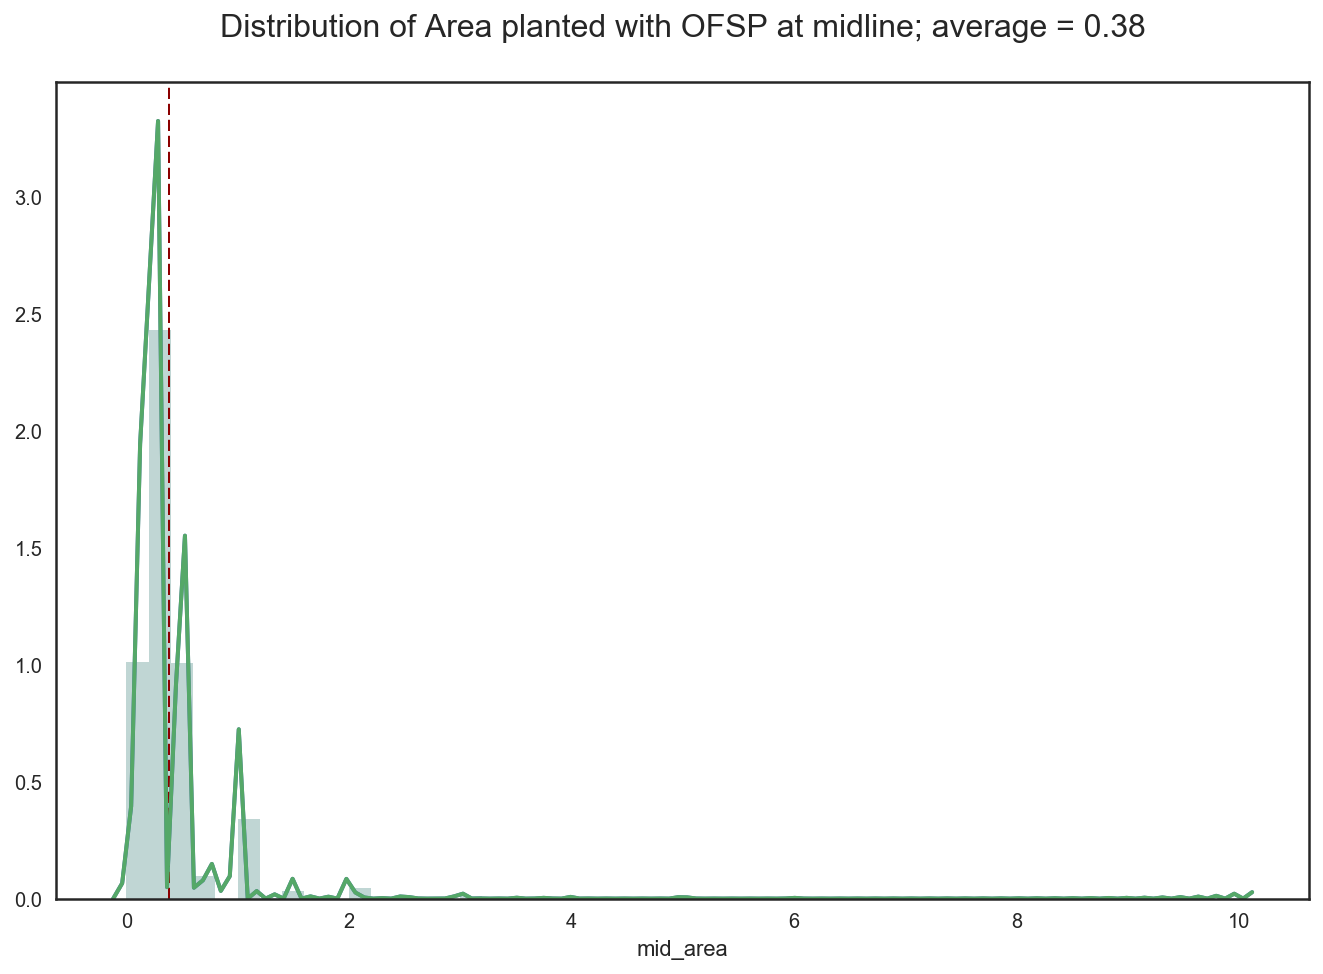

In [72]:
jsdf_mid_area = jsdf
jsdf_mid_area.dropna(subset = ['mid_area'], inplace=True)
mid_area = jsdf_mid_area['mid_area']
histogram_plotter("Area planted with OFSP at midline", mid_area)

# VISUALIZING DISTRO OF AREA PLANTED WITH OFSP AT MIDLINE: THE AGRICULTURAL OUTREACH PROGRAM SEEMS TO HAVE A BIG EFFECT!

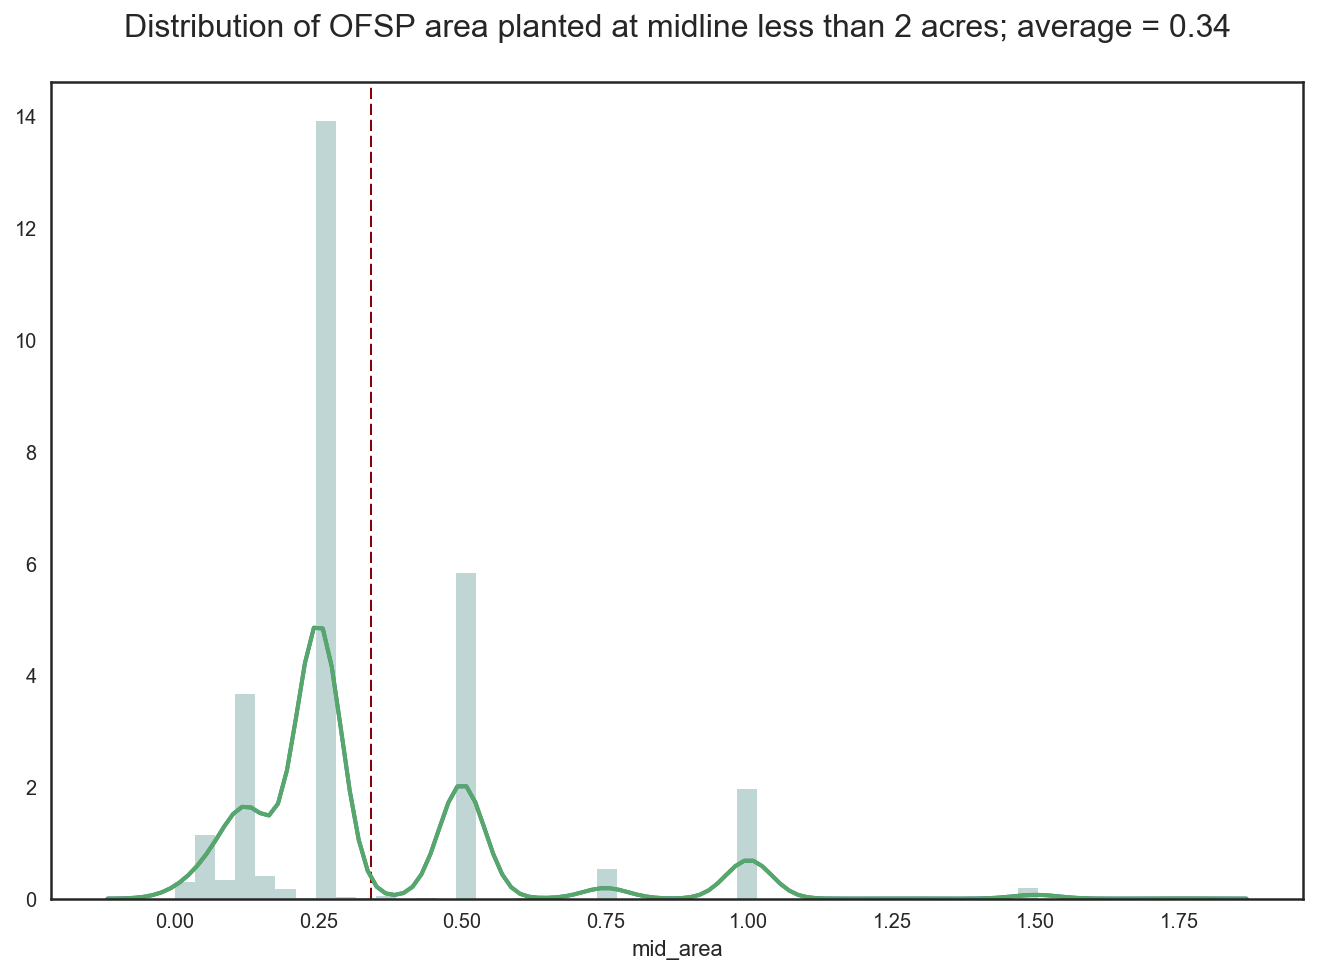

In [75]:
mid_area_lessthan2 = mid_area[(mid_area < 2)]
histogram_plotter("OFSP area planted at midline less than 2 acres", mid_area_lessthan2)

# ZOOMING IN WE SEE PLOTS ARE MEASURED IN 1/4 ACRES

In [80]:
jsdf['AA3'] = 5
jsdf.loc[(jsdf['h91'] == 1) & (jsdf['h92'] == 1) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 4
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 1) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 4
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 4
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 3
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 2
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 1
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 1
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 0
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 0
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) , 'AA3'] = 0
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 2) & (jsdf['h101'] == 1) , 'AA3'] = 0  
jsdf.loc[(jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 2) & (jsdf['h101'] == 2) , 'AA3'] = 0


# CONSTRUCTING AMBIGUITY AVERSION INDEX
# WHILE RISK AVERSION IS THE DEGREE TO WHICH ONE PREFERS A CHOICE WITH A KNOWN OUTCOME VERSUS ONE WITH AN UNCERTAIN OUTCOME
# (OF KNOWN ODDS AND PAYOFFS), AMBIGUITY AVERSION INTENDS TO MEASURE THE DEGREE TO WHICH ONE PREFERS A RISK WITH KNOWN ODDS
# AND PAYOFFS VS A RISK WITH UNKNOWN OR IMPRECISELY KNOWN ODDS AND/OR PAYOFFS. MY THESIS INVESTIGATES WHETHER THIS PREFERENCE
# CORRELATES WITH CROP ADOPTION. A KNOWN CROP REPRESENTS A RISK WITH KNOWN ODDS/PAYOFFS WHEREAS A NEW CROP REPRESENTS A RISK
# WITH UNKNOWN OUTCOMES/PAYOFFS

In [2]:
def AA(x):
    if (jsdf['h91'] == 1) & (jsdf['h92'] == 1) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 4
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 1) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 4
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 1) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 4
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 1) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 3
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 1) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 2
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 1) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 1
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 1) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 1
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 1) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 0
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 1) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 0
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 1) & (jsdf['h101'] == 1) :
        return 0
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 2) & (jsdf['h101'] == 1) :
        return 0
    elif (jsdf['h91'] == 2) & (jsdf['h92'] == 2) & (jsdf['h93'] == 2) & (jsdf['h94'] == 2) & (jsdf['h95'] == 2) & (jsdf['h96'] == 2) & (jsdf['h97'] == 2) & (jsdf['h98'] == 2) & (jsdf['h99'] == 2) & (jsdf['h100'] == 2) & (jsdf['h101'] == 2) :
        return 0
    else:
        return 5

# Alternately generating AA index as a function

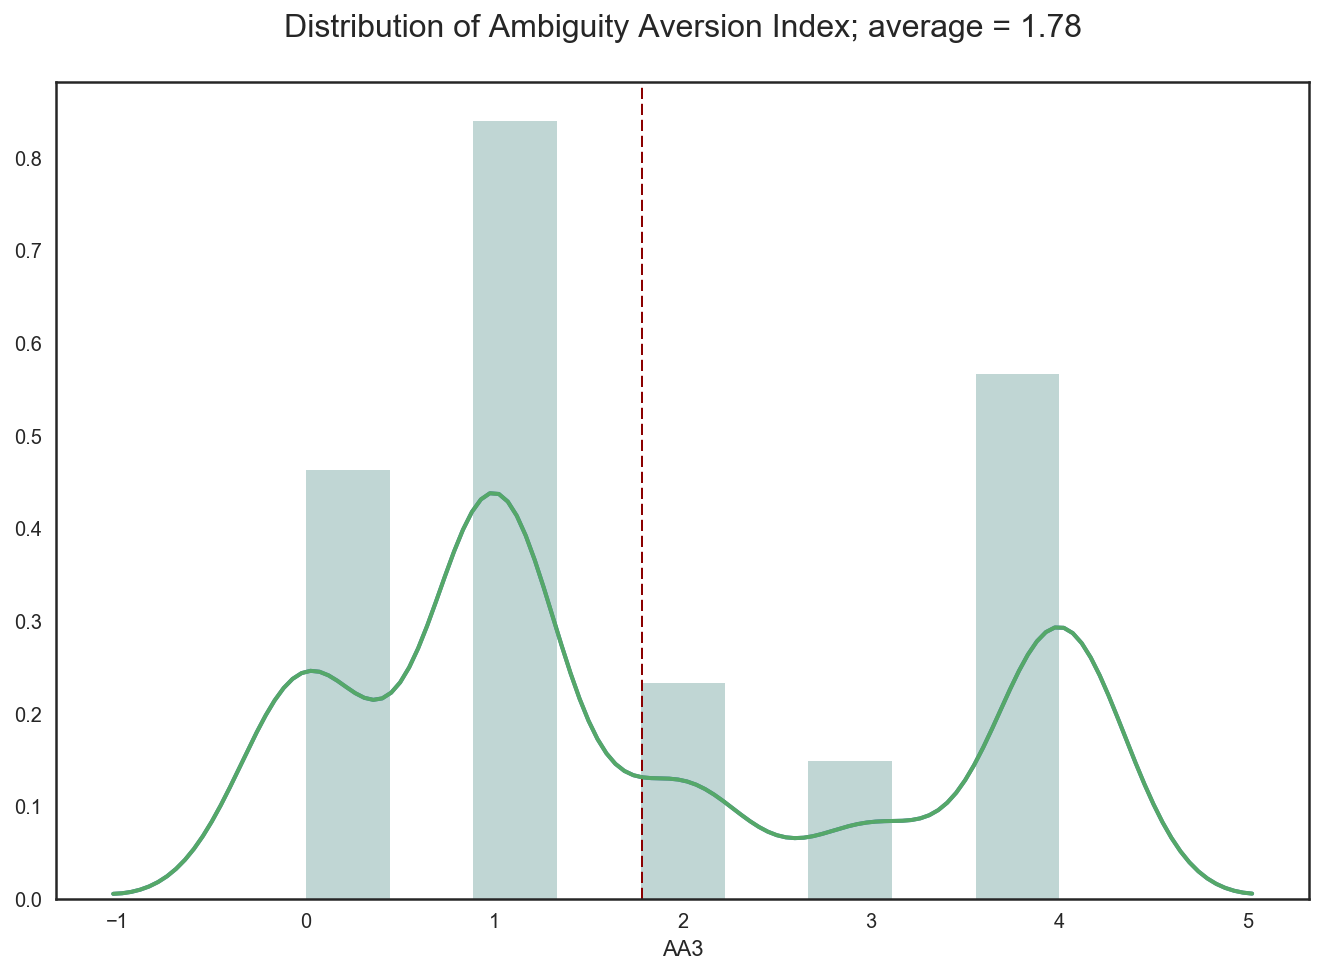

In [81]:
jsdf_AA3 = jsdf[jsdf.AA3 != 5]
AA3 = jsdf_AA3['AA3']
histogram_plotter("Ambiguity Aversion Index", AA3)

# TAKING A LOOK AT THE DISTRO OF AMIBGUITY AVERSION

In [86]:
pd.merge(jsdf_AA3, jsdf ,on='idno')

,idno,branch_x,bcode_x,dist_x,dcode_x,vil_x,vcode_x,b11_x,age_x,education_x,...,h95_y,h96_y,h97_y,h98_y,h99_y,h100_y,h101_y,treatmentTI_y,base_area_y,AA3_y
0,45,IBANDA,1,IBANDA,NaN,KITONTOMA CENTRAL,118,PRISCILLAH RUKUNDO,20.0,6.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3,0.0,1
1,47,IBANDA,1,IBANDA,NaN,KITONTOMA CENTRAL,118,AKAMPURIRA BRENDA,63.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3,0.0,0
2,51,IBANDA,1,IBANDA,NaN,KITONTOMA CENTRAL,118,AKAMPURIRA BRENDA JUSTINE,64.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,0.0,3
3,98,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,KYAMPAIRE DIANA,50.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,0.0,0
4,115,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,NANKUNDA DAMALI,45.0,9.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,0.0,1
5,111,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,KYAMPAIRE DIANA,38.0,3.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,0.0,1
6,95,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,ALBERT BARIHO,40.0,5.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,0.0,1
7,114,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,KYAMPAIRE DIANA,45.0,7.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,0.0,1
8,118,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,NANKUNDA DAMALI,18.0,7.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,0.0,1
9,92,IBANDA,1,IBANDA,NaN,KITONTOMA EAST,119,ALBERT BARIHO,28.0,5.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2,0.0,0


In [97]:
jsdf_AA3[['AA3', 'age']].corr()

# LOOKING AT THE CORRELATION BETWEEN AMBIGUITY AVERSION AND AGE. THE OLDER WE GET, THE MORE SET WE ARE IN OUR WAYS AND AVERSE
# TO UNKNOWN RISKS VS KNOWN ONES. SIGN SHOULD BE POSITIVE (AA INDEX CONSTRUCTED S.T. A HIGHER NUMBER IS MORE AMBIGUITY AVERSE)
# THIS MAKES SENSE, ALTHOUGH THE EFFECT IS SMALL AND WITHOUT SOME STAT ANALYSIS WE DO NOT KNOW IF IT IS STAT SIGNIFICANT

,AA3,age
AA3,1.000000,0.015144
age,0.015144,1.000000


In [98]:
jsdf_AA3[['AA3', 'education']].corr()

# LOOKING AT THE CORRELATION BETWEEN AMBIGUITY AVERSION AND EDUCATION
# MORE EDUCATION MEANS WERE ARE LESS AFRAID OF UNKNOWN RISKS (IN THE EXPERIMENT IN QUESTION, WHILE THE 'ODDS' ARE UKNOWN, THE
# EXPECTATION VALUE OF THE RISK MAY BE FIGURED OUT FROM THE INFO AT HAND) SO THE NEGATIVE SIGN MAKES SENSE.

,AA3,education
AA3,1.000000,-0.009436
education,-0.009436,1.000000
